In [120]:
#Question 1

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
collegedf = pd.read_csv('college.csv')

    

print(collegedf.tail())

                            College Private   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  


In [122]:
collegerecoded =  collegedf.copy(deep=True)

def privCatToNumber(private):
    if private == 'Yes':
        return 1
    elif private == 'No':
        return 0
collegerecoded['Private_N'] = collegerecoded['Private'].apply(privCatToNumber)
print(collegerecoded.tail())



                            College Private   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  \

In [123]:
college_names = collegerecoded['College'].nunique()
print(college_names)



777


In [124]:
collegerecoded.drop(['College', 'Private'], axis=1, inplace=True)

In [125]:
print(collegerecoded)

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.

In [126]:
#Question 2

In [127]:
X = collegerecoded.drop('Private_N', axis = 1)
y = collegerecoded['Private_N']
X = sm.add_constant(X)
college_model = sm.OLS(y,X)
college_results = college_model.fit()
print(college_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Private_N   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     77.94
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.99e-153
Time:                        22:16:40   Log-Likelihood:                -81.739
No. Observations:                 777   AIC:                             199.5
Df Residuals:                     759   BIC:                             283.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8799      0.102      8.640      

Based on only the summary results, S.F. Ratio, Outstate and Apps had the lowest p values showing they are significant. Outstate has a high t value, a low stndard deviation error and a coefficient that is small but not too outside the other p options. Based on this, and looking at a correlation table after, it seems to be the most important of the three. 

In [128]:
#Question 3

In [129]:
X = collegerecoded['Outstate']
y = collegerecoded['Private_N']
X = sm.add_constant(X)
college_model = sm.OLS(y,X)
college_results = college_model.fit()
print(college_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Private_N   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     340.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.40e-63
Time:                        22:16:40   Log-Likelihood:                -332.54
No. Observations:                 777   AIC:                             669.1
Df Residuals:                     775   BIC:                             678.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0879      0.037      2.369      0.0

In [130]:
print(collegerecoded.corr())

                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.33146

The R-Squared result of the summary for a simple linear regression model only using the feature of Outstate is .305. This show some level of correlation between students that are out of state and whether they are registered for private institution. The p value is also 0 so there is some level of importance here

That said, with the output feature only having results of 1 or 0, a logistic regression model might be better suited compared to the linear regression model being used now. It will be important to check the summary after fitting a model in that fashion instead. Based on the correlation table, where students take their freshman undergraduate studies seems a moderate amount of significance compared to other other options as well. Outstate is still fairly high on the list compared to other features. 

In [ ]:
#Question 4

[Text(0.5, 0, 'Outstate'),
 Text(0, 0.5, 'Private'),
 Text(0.5, 1.0, 'Simple Linear Regression Plot')]

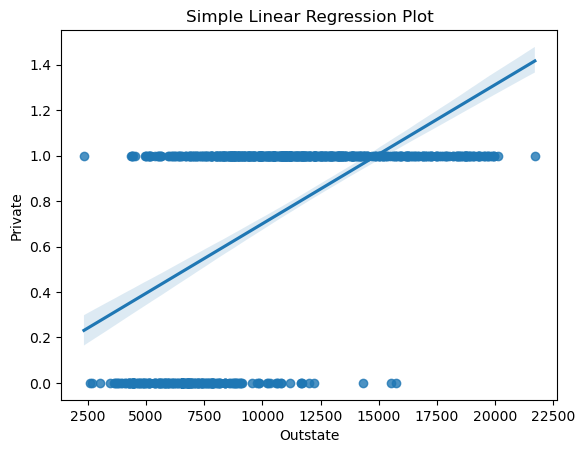

In [131]:
linearregplot = sns.regplot(data=collegerecoded, x='Outstate', y='Private_N', scatter=True, ci=95, x_jitter=None, y_jitter=None)
linearregplot.set(xlabel ="Outstate", ylabel = "Private", title ='Simple Linear Regression Plot')

[Text(0.5, 0, 'Outstate'),
 Text(0, 0.5, 'Private'),
 Text(0.5, 1.0, 'Simple Linear Regression Even P Data Plot')]

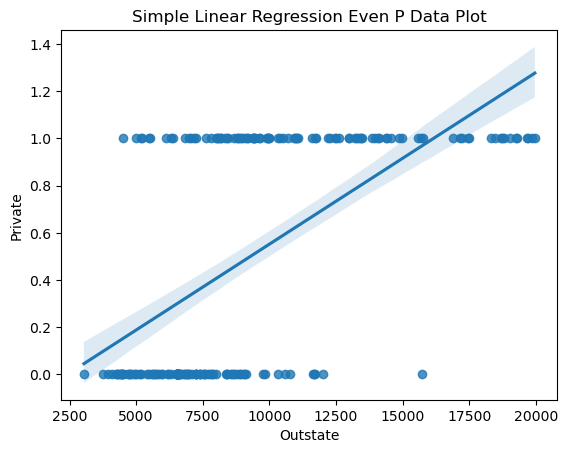

In [132]:
privatedataeven1 = collegerecoded.sort_values(by='Private_N').head(100)
privatedataeven2 = collegerecoded.sort_values(by='Private_N').tail(100)

privatedataeven = pd.concat([privatedataeven1,privatedataeven2])

linearregplot2 = sns.regplot(data=privatedataeven, x='Outstate', y='Private_N', scatter=True, ci=95, x_jitter=None, y_jitter=None)

linearregplot2.set(xlabel ="Outstate", ylabel = "Private", title ='Simple Linear Regression Even P Data Plot')



In [ ]:
#Question 5

In [133]:
orig_collegerecoded =  collegerecoded.copy(deep=True)


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

X = orig_collegerecoded[['Outstate']]
y = orig_collegerecoded['Private_N']

model = LinearRegression()
model.fit(X,y)

predictions = model.predict(X)

r_squared = r2_score(y, predictions)
print("R-Squared Score:", r_squared)
mse = mean_squared_error(y, predictions)
print("Mean-Squared Error:", mse)





R-Squared Score: 0.30542190924867874
Mean-Squared Error: 0.1378044846449206


In [135]:
threshold = 0.5
bpredictions = (predictions > threshold).astype(int)

confusionMatrix = metrics.confusion_matrix(y, bpredictions)
print("Confusion Matrix:\n", confusionMatrix)
accuracy = metrics.accuracy_score(y, bpredictions)
print("Accuracy:", accuracy)



Confusion Matrix:
 [[111 101]
 [ 38 527]]
Accuracy: 0.8211068211068211


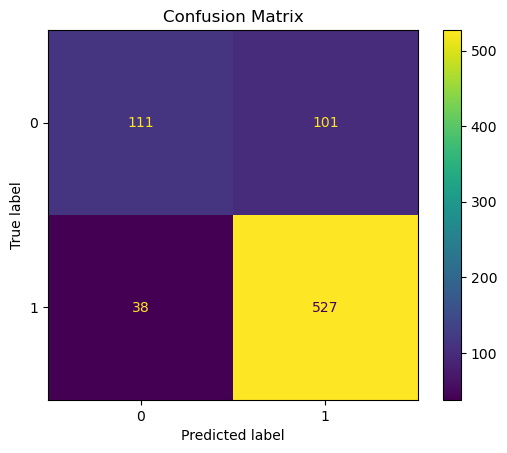

Accuracy (Double Check): 0.8211068211068211


In [136]:
confusionMatrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ["0", "1"])
confusionMatrixDisplay.plot()
plt.title("Confusion Matrix")
plt.show()

accuracydoublecheck = (111+527)/(111+101+38+527)
print("Accuracy (Double Check):", accuracydoublecheck)

In [137]:
collegerecoded = collegerecoded.assign(FeatOneLinRegPred=predictions)
collegerecoded = collegerecoded.assign(FeatOneLinRegBPred=bpredictions)
print(collegerecoded)

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.

In [ ]:
#Question 6

In [138]:
X = orig_collegerecoded[['Apps','Accept','Enroll','Top10perc',
                         'Top25perc','F.Undergrad','P.Undergrad',
                         'Outstate','Room.Board','Books',
                         'Personal','PhD','Terminal',
                         'S.F.Ratio','perc.alumni','Expend','Grad.Rate']]
y = orig_collegerecoded['Private_N']

model = LinearRegression()
model.fit(X,y)

predictions = model.predict(X)

r_squared = r2_score(y, predictions)
print("R-Squared Score:", r_squared)
mse = mean_squared_error(y, predictions)
print("Mean-Squared Error:", mse)

R-Squared Score: 0.6357850382751401
Mean-Squared Error: 0.07226034879126846


In [139]:
threshold = 0.5
bpredictions = (predictions > threshold).astype(int)

confusionMatrix = metrics.confusion_matrix(y, bpredictions)
print("Confusion Matrix:\n", confusionMatrix)
accuracy = metrics.accuracy_score(y, bpredictions)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[178  34]
 [ 13 552]]
Accuracy: 0.9395109395109396


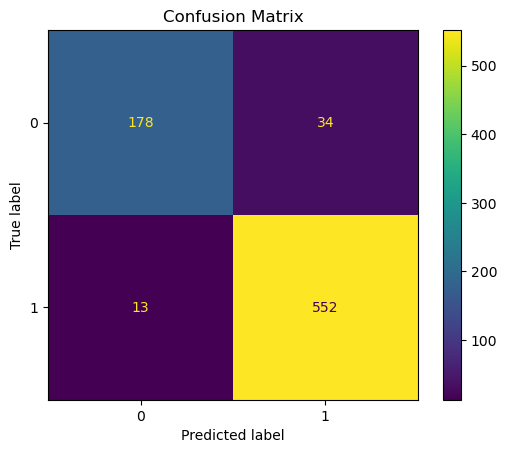

Accuracy (Double Check): 0.9395109395109396


In [140]:
confusionMatrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ["0", "1"])
confusionMatrixDisplay.plot()
plt.title("Confusion Matrix")
plt.show()

accuracydoublecheck = (178+552)/(178+34+13+552)
print("Accuracy (Double Check):", accuracydoublecheck)

In [141]:
collegerecoded = collegerecoded.assign(FeatMultMultRegPred=predictions)
collegerecoded = collegerecoded.assign(FeatOneMultRegBPred=bpredictions)
print(collegerecoded)

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  ...  Terminal  S.F.Ratio  per

The accuracy seems to be larger when using all of the features for the multiple linear regression model. The accuracy shows the predictions did better this time around compared to the simple linear regression model from the previous question. This makes sense overall because the previous model only used one feature for its independent variable compared to this model that is a lot more feature. There is a balance to the amount of features used in a model. Too little can make it less effective. Too many features can be an issue too. With something that uses an dependent variable that only has a 1 or 0, linear regression isn't always the best choice either. However, in this case, like stated, for this particular case, the increase in features involved seemed to help with the accuracy. The current format still might not be ideal as it is using a line.

In [ ]:
#Question 7

In [143]:
X = orig_collegerecoded.drop('Private_N', axis = 1)
y = orig_collegerecoded['Private_N']
X = sm.add_constant(X)
college_model = sm.Logit(y,X)
college_results = college_model.fit()
print(college_results.summary())

Optimization terminated successfully.
         Current function value: 0.154120
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Private_N   No. Observations:                  777
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                           17
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.7370
Time:                        22:16:41   Log-Likelihood:                -119.75
converged:                       True   LL-Null:                       -455.37
Covariance Type:            nonrobust   LLR p-value:                1.115e-131
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0257      1.860     -0.014      0.989      -3.671       3.620
Apps           -0.0005    

In [ ]:
#Question 8

In [144]:
X = orig_collegerecoded['Outstate']
y = orig_collegerecoded['Private_N']
X = sm.add_constant(X)
college_model = sm.Logit(y,X)
college_results = college_model.fit()
print(college_results.summary())

Optimization terminated successfully.
         Current function value: 0.369942
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Private_N   No. Observations:                  777
Model:                          Logit   Df Residuals:                      775
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.3688
Time:                        22:16:41   Log-Likelihood:                -287.45
converged:                       True   LL-Null:                       -455.37
Covariance Type:            nonrobust   LLR p-value:                 5.093e-75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5221      0.409    -11.045      0.000      -5.325      -3.720
Outstate       0.0006   4.96e

In [ ]:
#Question 9

[Text(0.5, 0, 'Outstate'),
 Text(0, 0.5, 'Private'),
 Text(0.5, 1.0, 'Logistic Regression Plot')]

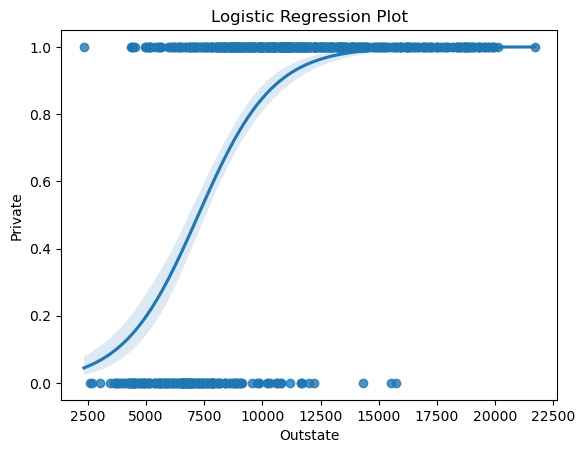

In [146]:
lregplot = sns.regplot(data=orig_collegerecoded, x='Outstate', y='Private_N', logistic=True, ci=95, x_jitter=None, y_jitter=None)
lregplot.set(xlabel ="Outstate", ylabel = "Private", title ='Logistic Regression Plot')

[Text(0.5, 0, 'Outstate'),
 Text(0, 0.5, 'Private'),
 Text(0.5, 1.0, 'Logistic Regression Even P Data Plot')]

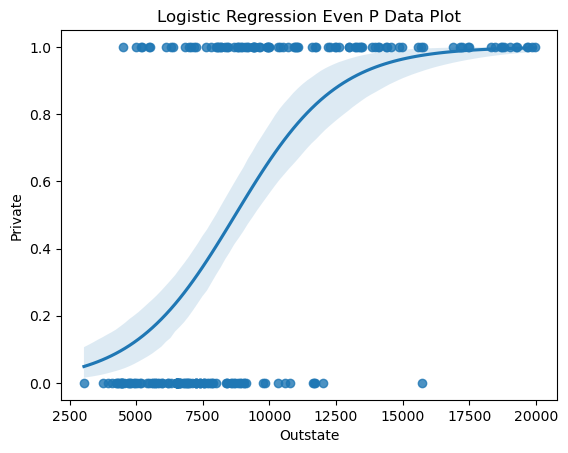

In [147]:
privatedataeven1 = orig_collegerecoded.sort_values(by='Private_N').head(100)
privatedataeven2 = orig_collegerecoded.sort_values(by='Private_N').tail(100)

privatedataeven = pd.concat([privatedataeven1,privatedataeven2])

plot2 = sns.regplot(data=privatedataeven, x='Outstate', y='Private_N', logistic=True, ci=95, x_jitter=None, y_jitter=None)

plot2.set(xlabel ="Outstate", ylabel = "Private", title ='Logistic Regression Even P Data Plot')



In [ ]:
#Question 10

In [148]:
import numpy as np

X = orig_collegerecoded['Outstate']
y = orig_collegerecoded['Private_N']
X = sm.add_constant(X)
college_model = sm.Logit(y,X)
college_results = college_model.fit()
predicted_values = college_results.predict(X)
lbpredictions = np.round(predicted_values)

Optimization terminated successfully.
         Current function value: 0.369942
         Iterations 8


In [149]:
confusionMatrix = metrics.confusion_matrix(y, lbpredictions)
print("Confusion Matrix: ")
print(confusionMatrix)
accuracy = metrics.accuracy_score(y, lbpredictions)

print("Accuracy: ")
print(accuracy)


Confusion Matrix: 
[[140  72]
 [ 53 512]]
Accuracy: 
0.8391248391248392


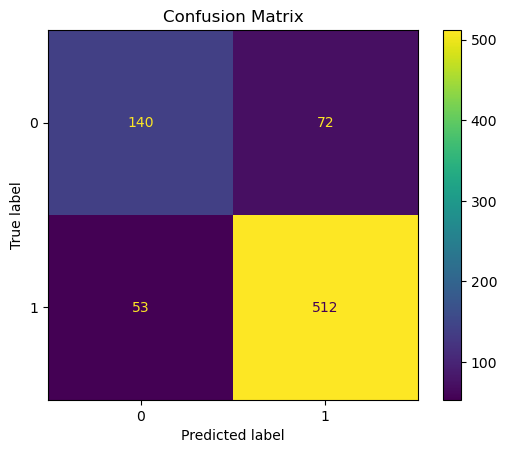

Accuracy (Double Check): 
0.8391248391248392


In [150]:
confusionMatrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ["0", "1"])
confusionMatrixDisplay.plot()
plt.title("Confusion Matrix")
plt.show()

accuracy2 = np.mean(lbpredictions == y)
print("Accuracy (Double Check): ")
print(accuracy2)

In [151]:
collegerecoded = collegerecoded.assign(FeatOneLogRegPred=predicted_values)
collegerecoded = collegerecoded.assign(FeatOneLogRegBPred=lbpredictions)
print(collegerecoded)

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  ...  perc.alumni  Expend  Gra

In [ ]:
#Question 11

In [152]:
X = orig_collegerecoded.drop('Private_N', axis = 1)
y = orig_collegerecoded['Private_N']
X = sm.add_constant(X)
college_model = sm.Logit(y,X)
college_results = college_model.fit()
predicted_values = college_results.predict(X)
lbpredictions = np.round(predicted_values)

Optimization terminated successfully.
         Current function value: 0.154120
         Iterations 9


In [153]:
confusionMatrix = metrics.confusion_matrix(y, lbpredictions)
print("Confusion Matrix: ")
print(confusionMatrix)
accuracy = metrics.accuracy_score(y, lbpredictions)

print("Accuracy: ")
print(accuracy)


Confusion Matrix: 
[[191  21]
 [ 22 543]]
Accuracy: 
0.9446589446589446


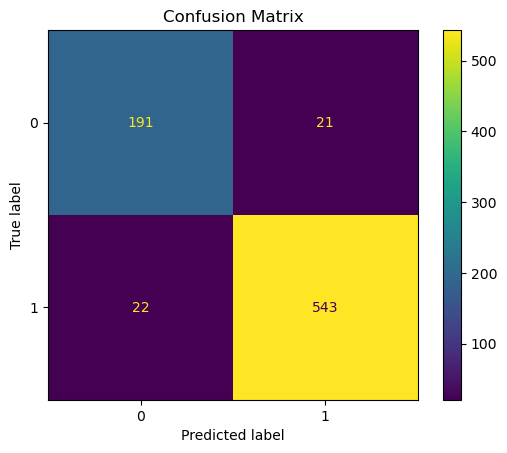

Accuracy (Double Check): 
0.9446589446589446


In [154]:
confusionMatrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ["0", "1"])
confusionMatrixDisplay.plot()
plt.title("Confusion Matrix")
plt.show()

accuracy2 = np.mean(lbpredictions == y)
print("Accuracy (Double Check): ")
print(accuracy2)

In [155]:
collegerecoded = collegerecoded.assign(FeatMultLogRegPred=predicted_values)
collegerecoded = collegerecoded.assign(FeatMultLogRegBPred=lbpredictions)
print(collegerecoded)

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  ...  Grad.Rate  Private_N  \


In [156]:
precision = 191 / (191+21)
print("Precision: ")
print(precision)

recall = 191 / (191+ 22)
print("Recall: ")
print(recall)

f1 = 2*((precision*recall)/(precision+recall))
print("F1 Score: ")
print(f1)

Precision: 
0.9009433962264151
Recall: 
0.8967136150234741
F1 Score: 
0.8988235294117647
